# AllLifeBank Customer Segmentation - Problem Statement


AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

# Objective

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank

### About the Dataset

This dataset contains key statistical indicators of the countries. It covers sections like general information, economic indicators, social indicators, environmental & infrastructure indicators. 
 
### Data Dictionary
- Sl_No	
- Customer Key
- Avg_Credit_Limit
- Total_Credit_Cards
- Total_visits_bank
- Total_visits_online
- Total_calls_made

Data Description: Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

**Import necessary libraries**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

**Read the dataset**

In [70]:
df = pd.read_excel("Credit Card Customer Data.xlsx")

In [71]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observation**
- We have 7 features and 660 rows in the dataset. No null values are observed, but we will confirm it. Datatypes appears to be correct for nuemrical values. 

In [73]:
# Lets us look at the data summary
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


**Observations**
- Average number of cards held by customers are 4 with avergae credit limit of 35K.
- Intersetingly, the average numbers of cusomer queries(~ 2.5) to brick-and-mortar bank is same as the online portal of the bank. However, the most active customers are online avergaing 15/month compared to 5 to physical bank. For customers who dial in with queries, the average is the highest(~ 3.6), indicating that this has be the focus area of improvement fo maximum returns 

In [74]:
# Lets see unique values for each feature to understand their distribution
colmns = df.columns
for col in colmns:
    print('\n Unique Values of {} are \n'.format(col), df[col].unique())
    print('Unique Numbers of {} ='.format(col), df[col].nunique())
    print('*' * 90)


 Unique Values of Sl_No are 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239

Unique Numbers of Customer Key = 655, which implies that some customers have mulitple entries

In [11]:
# Lets see customer keys with muliple entries
print(df['Customer Key'].value_counts())

50706    2
37252    2
97935    2
96929    2
47437    2
        ..
58708    1
92501    1
33110    1
92503    1
75775    1
Name: Customer Key, Length: 655, dtype: int64


5 customers have two entries. We will leave them untreated as the could be genuine entries or typos in customer Key

**Reason for choosing variables for clustering**
- Sl_No and Customer Key is just serialized information and will have no significance to modelling. So, we will drop them.
- All other features are significant for clustering. 


In [75]:
df.drop('Sl_No', axis=1, inplace=True)
df.drop('Customer Key', axis=1, inplace=True)

In [76]:
# We will use only a subset of all columns to do the clustering

cluster_cols = [
    'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
    'Total_visits_online', 'Total_calls_made'
]

In [77]:
df1 = df[cluster_cols].copy()
df1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


### Checking for any anomalous values in the data by printing them

In [84]:
colmns = df.columns
for col in cluster_cols:
    print('\nValue counts of {} are \n'.format(col),pd.value_counts(df1[col]))
    print('*' * 90)


Value counts of Avg_Credit_Limit are 
 8000      35
6000      31
13000     28
9000      28
10000     26
19000     26
11000     24
7000      24
18000     23
17000     23
14000     23
16000     22
5000      21
20000     20
12000     18
15000     17
36000     11
70000     10
50000      8
38000      8
56000      7
39000      7
68000      7
41000      6
48000      6
47000      6
34000      6
30000      6
52000      6
37000      6
74000      6
26000      5
65000      5
60000      5
29000      5
31000      5
73000      4
49000      4
59000      4
54000      4
71000      4
51000      4
66000      4
69000      4
64000      4
33000      4
40000      3
61000      3
44000      3
62000      3
28000      3
45000      3
57000      3
72000      3
67000      3
100000     3
58000      3
46000      3
172000     2
42000      2
166000     2
163000     2
84000      2
195000     2
27000      2
32000      2
63000      2
75000      2
156000     2
35000      2
173000     1
153000     1
167000     1
95000      

In [85]:
#checking for missing values

df1.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

No Missing values!!

In [87]:
# checking median of attributes grouped by Total_Credit_Cards
df1.groupby('Avg_Credit_Limit').median()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,,,,
3000,4.0,0.0,1.0,7.0
5000,2.0,2.0,2.0,5.0
6000,4.0,2.0,2.0,5.0
7000,4.0,2.0,2.0,4.0
8000,4.0,2.0,2.0,4.0
9000,3.0,1.5,2.0,5.5
10000,4.0,2.0,2.0,4.0
11000,3.0,2.0,2.0,5.0
12000,4.5,2.0,2.0,2.0


** Observations
- Customers with low Credit Limit prefer to call-in with queries
- Whereas, Customers with Medium to High Credit limit prefer to use the online bank portal

## EDA

### Univariate Analysis

In [97]:
data = df1.copy()

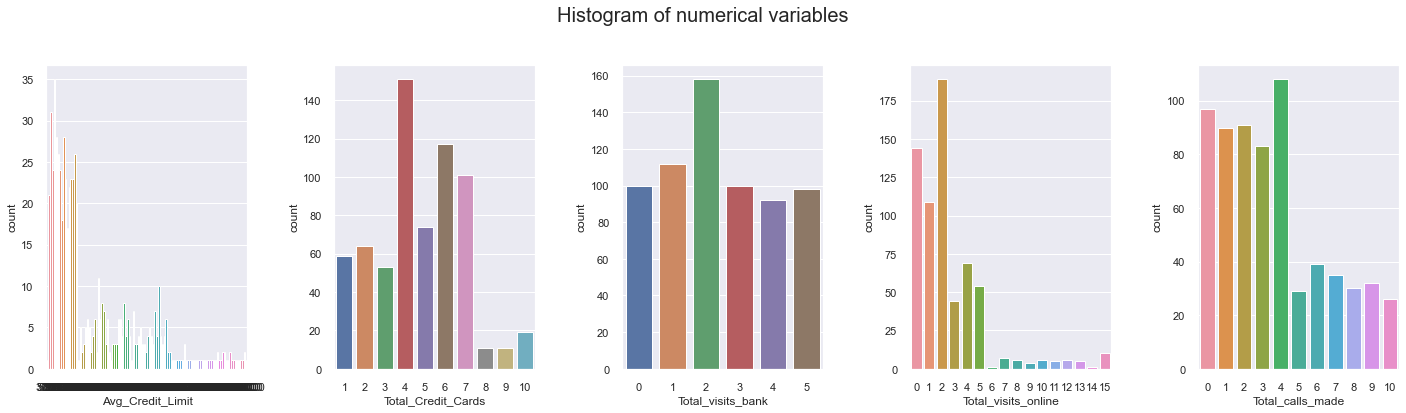

In [98]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.countplot(ax=axes[ii], x=data[cluster_cols[counter]])
    counter = counter + 1

fig.tight_layout(pad=2.0)

**Observations**
- Most of the features appear to be right skewed, as expected.
- Most customers have 4-7 credit cards. This section could be targetted better for retention
- Banks visits are evenly distributed. Is it possible that there is a section of customers who whose all platforms extensively?


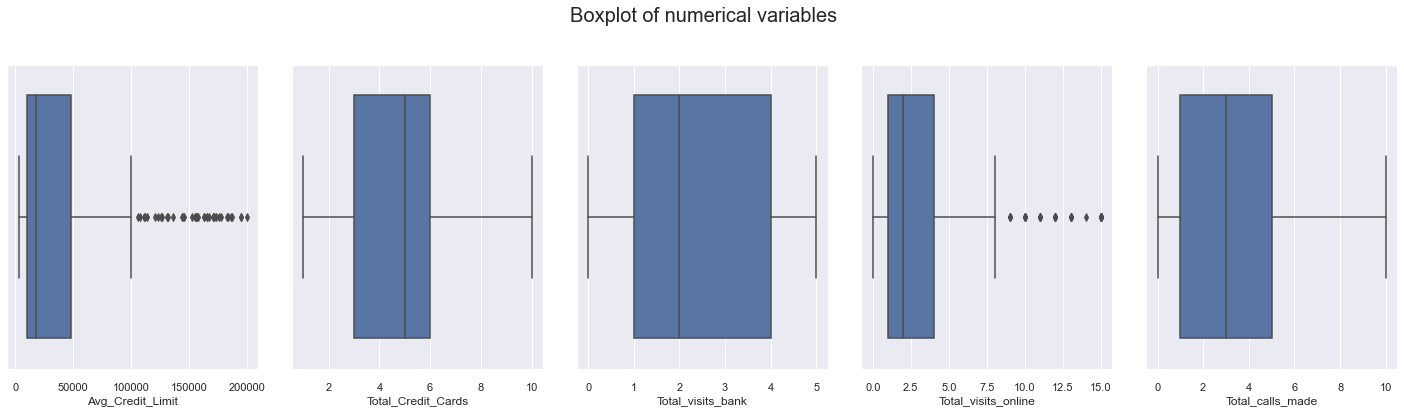

In [99]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
fig.suptitle('Boxplot of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], x=data[cluster_cols[counter]])
    counter = counter + 1

fig.tight_layout(pad=2.0)

There are outliers in Avg_Credit_Limit and Total_visits_online. However, they are uniformly distributed so we will leave them untreated. These outliers wont impact Hierarical Clustering

# Bivariate Analysis

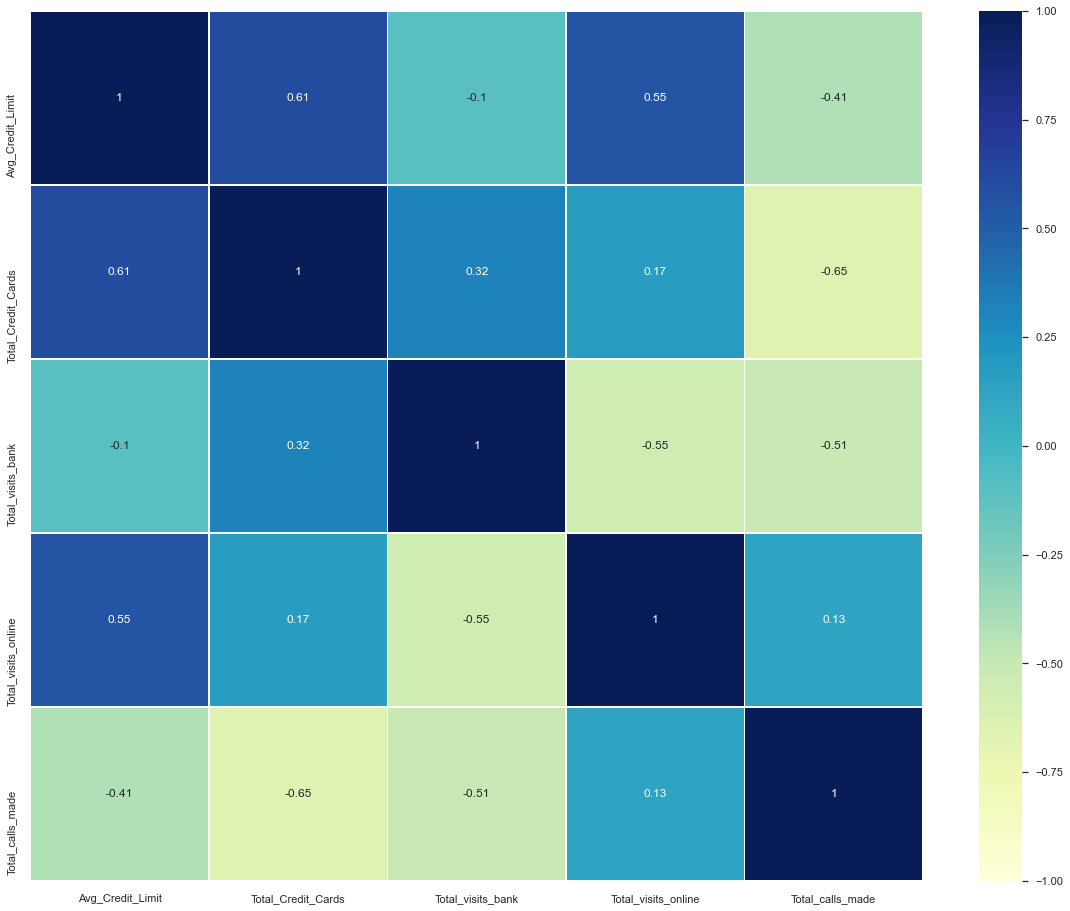

In [100]:
plt.figure(figsize=(20, 16))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=0.5,
            vmin=-1,
            vmax=1,
            center=0,
            cbar=True,
            cmap="YlGnBu")

plt.show()

Observations
- Interestingly, there is a negative correlation between the three query approaches made by the customers. So the segment of customers making phone queries are different from online bank customer segment and from brick-and-mortar customers. These segemnts are mutually exclusive. This implies that the customers can be clustered into different segments 
- Total Credit cards and Average Credit Limit are highly correalted. 

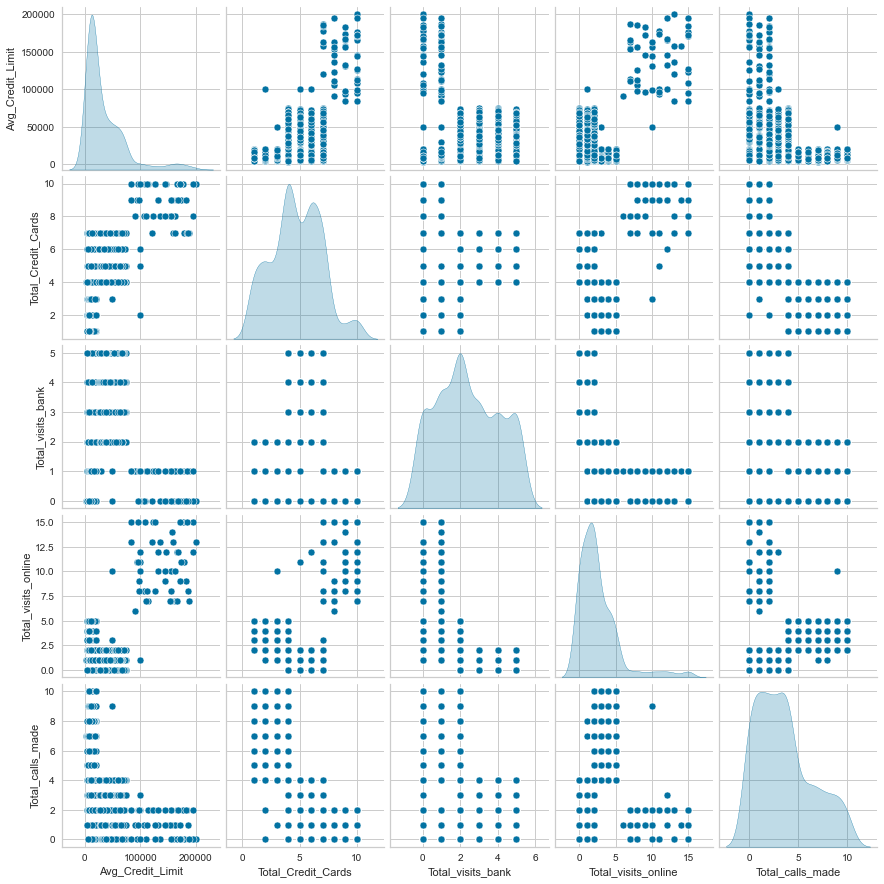

In [26]:
sns.pairplot(data[cluster_cols], diag_kind="kde")

**Observations**
- Lower the credit limit, higher the phone calls and higher the visits to the bank
- Higher credit limit, higher the online bank visits
- Most distributions are rightly skewed

**Standardize the data**

In [101]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = data[cluster_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [134]:
#Creating a dataframe from the scaled data above
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593
6,1.740187,0.135694,-1.473731,2.861408,-0.553005
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326


Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9907468928853334
Number of Clusters: 6 	Average Distortion: 0.9429628182681223
Number of Clusters: 7 	Average Distortion: 0.9103846723742086
Number of Clusters: 8 	Average Distortion: 0.8898650074043621


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

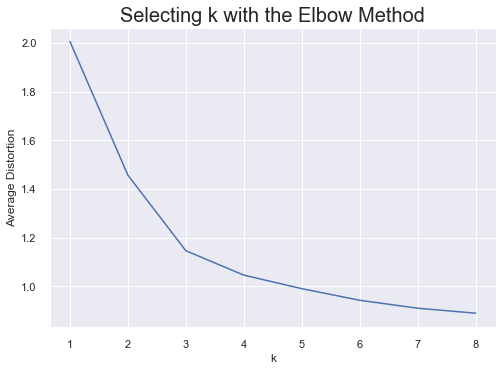

In [106]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = sum(
        np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'),
               axis=1)) / subset_scaled_df.shape[0]

    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

The appropriate value of k from elbow curve seems to be 4 or 5

#### Let us check the Sihoutte score

In [107]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(
        n_clusters, score))

For n_clusters = 2, silhouette score is 0.41842496663215445)
For n_clusters = 3, silhouette score is 0.5157182558881063)
For n_clusters = 4, silhouette score is 0.3556670619372605)
For n_clusters = 5, silhouette score is 0.2717470361089752)
For n_clusters = 6, silhouette score is 0.25545029453623114)
For n_clusters = 7, silhouette score is 0.24855525590032607)
For n_clusters = 8, silhouette score is 0.22756437271245886)
For n_clusters = 9, silhouette score is 0.2200728268743468)


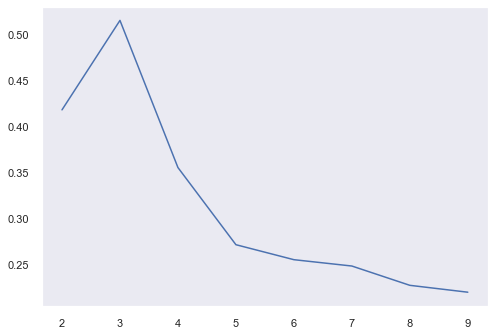

In [108]:
plt.plot(cluster_list,sil_score)
plt.grid()

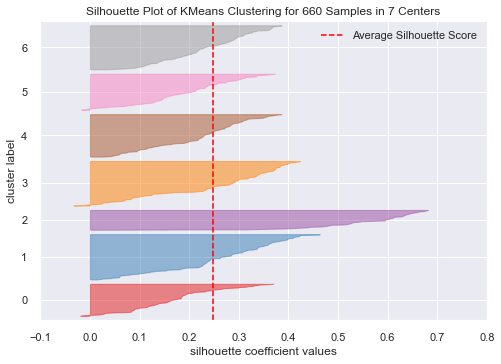

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [109]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

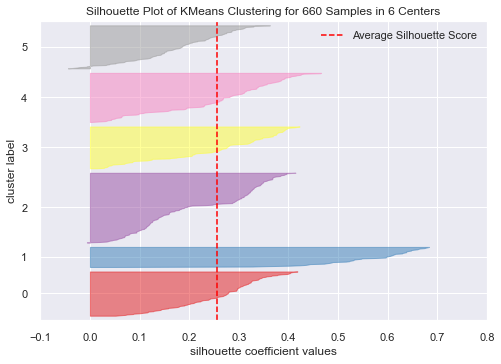

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [110]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

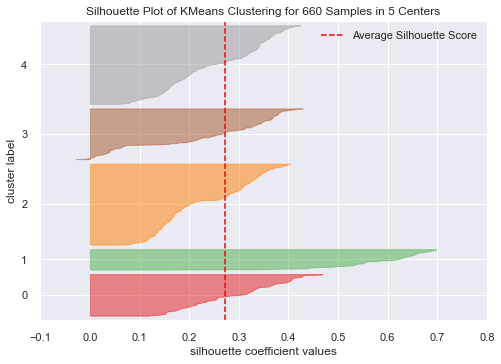

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [111]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

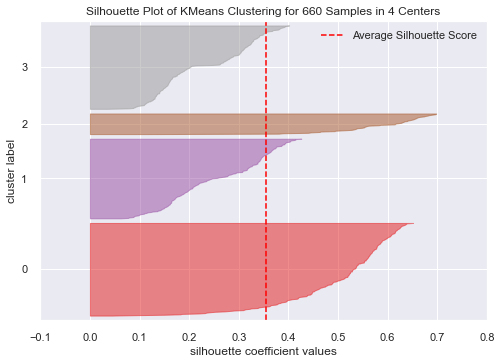

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [112]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

Let us take 5 as appropriate no. of clusters as silhoutte score is high enough and there is knick at 5 in elbow curve.

In [128]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=0)

In [129]:
data['K_means_segments'] = kmeans.labels_

In [130]:
cluster_profile = data.groupby('K_means_segments').mean()

In [116]:
cluster_profile['count_in_each_segment'] = data.groupby('K_means_segments')['Avg_Credit_Limit'].count().values

In [117]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12300.813008,2.357724,0.878049,3.626016,8.398374,123
1,31226.315789,5.478947,4.515789,1.010526,1.936842,190
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,12019.801980,2.475248,1.000000,3.465347,5.009901,101
4,36260.204082,5.551020,2.494898,0.954082,2.061224,196


<AxesSubplot:xlabel='K_means_segments'>

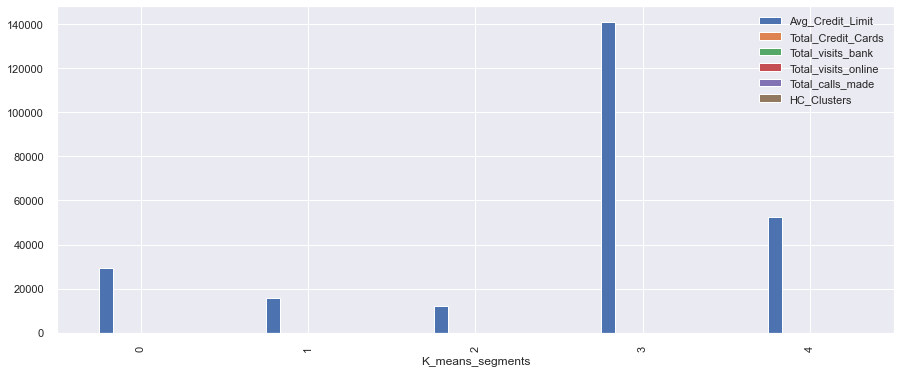

In [133]:
data.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

In [137]:
#Lets normalize the avg_credit limit to visualize all features
data1=data.copy() 
data1[count_in_each_segment]= 
data1['Avg_Credit_Limit'] = data['Avg_Credit_Limit'].div(10000).round(2)
data1

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,HC_Clusters
0,10.0,2,1,1,0,4,1
1,5.0,3,0,10,9,2,4
2,5.0,7,1,3,4,4,1
3,3.0,5,1,1,4,4,1
4,10.0,6,0,12,3,3,2
...,...,...,...,...,...,...,...
655,9.9,10,1,10,0,3,2
656,8.4,10,1,13,2,3,2
657,14.5,8,1,9,1,3,2
658,17.2,10,1,15,0,3,2


<AxesSubplot:xlabel='K_means_segments'>

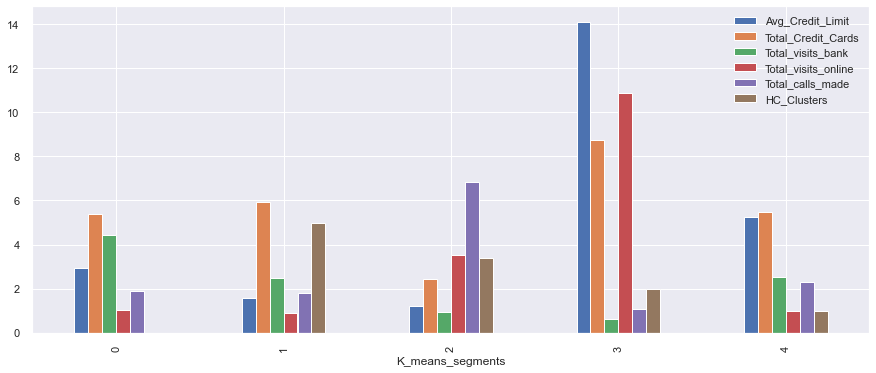

In [138]:
data1.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

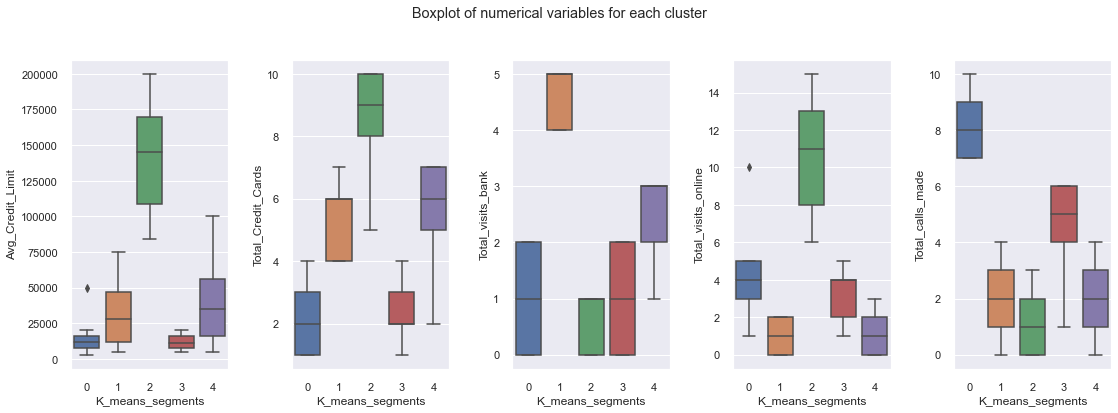

In [119]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],
                y=data[cluster_cols[counter]],
                x=data['K_means_segments'])
    counter = counter + 1

fig.tight_layout(pad=2.0)

**Insights**
- Clusters 0 :
    - Credit Limit is low 
    - Total credit cards is medium
    - Total bank visits is low 
    - Total visits online is medium  
    - Total calls made is highest 
- Cluster 1 :
    - Credit Limit is medium 
    - Total credit cards is medium
    - Total bank visits is high 
    - Total visits online is low  
    - Total calls made is low
- Cluster 2 :
    - Credit Limit is highest
    - Total credit cards is highest
    - Total bank visits is low 
    - Total visits online is highest 
    - Total calls made is low
- Cluster 3:
    - Credit Limit is low 
    - Total credit card is low
    - Total bank visits is low 
    - Total visits online is low  
    - Total calls made is medium
- Cluster 4:
    - Credit Limit is medium 
    - Total credit card is medium
    - Total bank visits is medium
    - Total visits online is low 
    - Total calls made is low
    

### Hierarchical Clustering

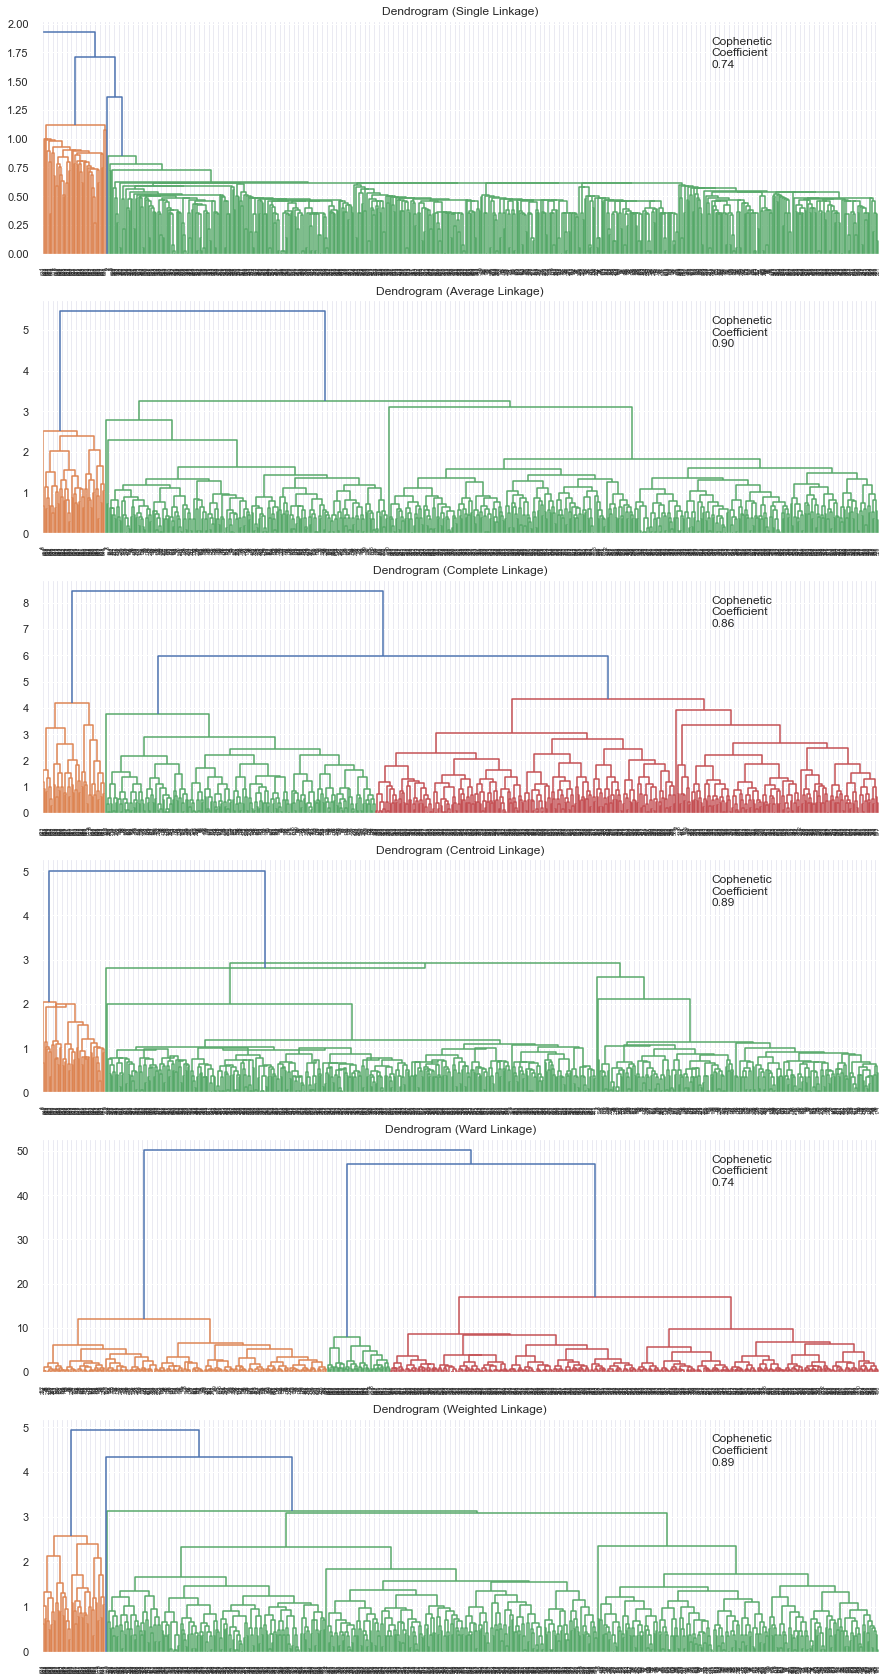

In [139]:
# List of all linkage methods to check
methods = ['single', 'average', 'complete', 'centroid', 'ward', 'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
# compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):

    Z = linkage(subset_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', (0.80, 0.80),
                    xycoords='axes fraction')
#     compare.append([method, coph_corr])

##### **Observations**
- Out of all the dendrogram we see, it is clear that dendrogram with ward linkage method gave us separate and distinct clusters
- 5 cluster would be appropriate number of cluster from dendrogram with ward linkage method  

##### Let us create 5 clusters

In [148]:
#Trying with K value as 5
HCmodel = AgglomerativeClustering(n_clusters=5,
                                  affinity='euclidean',
                                  linkage='ward')
HCmodel.fit(subset_scaled_df)
subset_scaled_df['HC_Clusters'] = HCmodel.labels_

In [146]:
data['HC_Clusters'] = HCmodel.labels_

In [145]:
cluster_profile = data.groupby('HC_Clusters').mean()

In [149]:
cluster_profile['count_in_each_segments'] = data.groupby(
    'HC_Clusters')['Avg_Credit_Limit'].count().values

In [150]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,38298.429319,5.670157,2.523560,0.947644,2.099476,2.837696,191
1,29474.226804,5.365979,4.448454,1.010309,1.891753,0.000000,194
2,141040.000000,8.740000,0.600000,10.900000,1.080000,3.000000,50
3,11834.586466,2.631579,0.977444,3.338346,5.556391,2.000000,133
4,12608.695652,2.119565,0.880435,3.847826,8.739130,2.000000,92


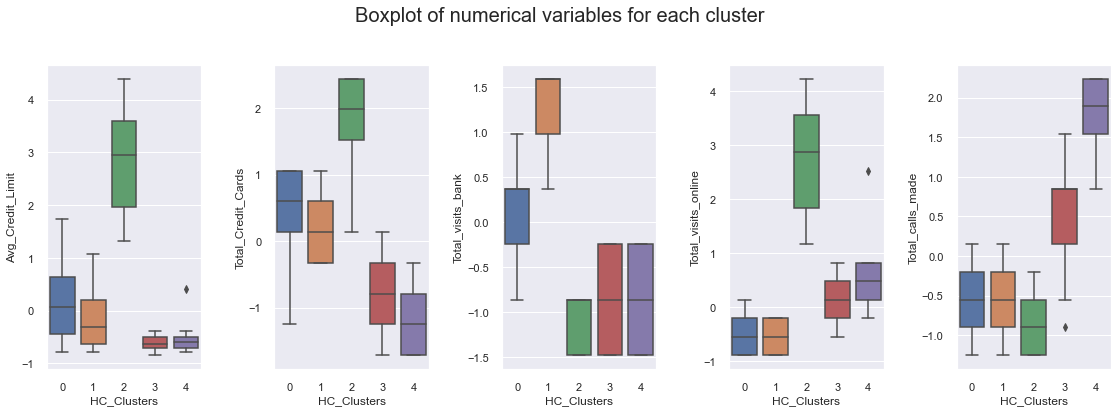

In [155]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[cluster_cols[counter]],x=subset_scaled_df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Compare Clusters between K means and Hierarchical clusters**

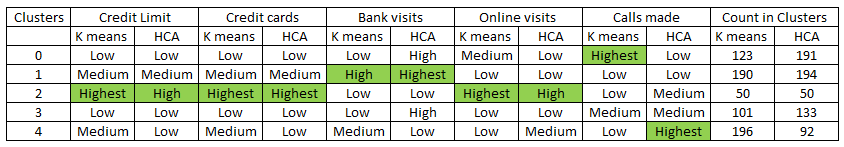

#####  Observation 
- As seen in the table above, the clusters found in K-Means and Heirarchical Clustering are quite similar.
- The numbers of clusters found are the same in K-Means and Heirarchical Clustering. The counts in each clauster are quite similar

# Business Recommendations
- Cluster 0  - have customers with low credit limit and medium credit card utilization and they prefer to call in with queries, based on K-means 
  - ** Recommendation - Business can offer better phone service to these customers as they are a sizeable percentage of population. They can be offered more credit cards as their credit card utilization is low.

- Cluster 1  - have customers with medium credit limit and medium credit card utilization and they prefer to goto Bank with queries. 
  - ** Recommendation - Business can offer better in person service to these customers as they are a sizeable percentage of population. They can be offered more informatio about online banking for some services, keeping their convenienece in mind.
  
- Cluster 2  - have customers with high credit limit and high credit card utilization and they prefer to use Online Bank for queries.  
  - ** Recommendation - Business can look to add more customers in this category, as this cluster is a small percentage of teh customers population.
  
- Cluster 3  - have customers with low credit limit and low credit card utilization and they seldom make queries. 
  - ** Recommendation - Business can contact these customers to offer credit cards or to get feedback about service. T
  
- Cluster 4  - have customers with low credit limit and low credit card utilization and they prefer to call in with queries, based on HCA clustering 
  - ** Recommendation - Business can offer better phone service to these customers as they are a sizeable percentage of population. They can be offered more credit cards as their creidt card utilization is low
